In [249]:
import tensorflow as tf
from keras import layers
from keras import models
import numpy as np
import matplotlib.pyplot as plt

In [255]:
square = models.Sequential()
#n_zernike = 8
#n_actuators = 51
square.add(layers.Dense(1))
square.add(layers.Dense(4096, activation='relu', kernel_initializer='normal'))
square.add(layers.Dense(2048, activation='linear'))
square.add(layers.Dense(1024, activation="relu"))
square.add(layers.Dense(2048, activation="linear"))
square.add(layers.Dense(4096, activation="relu"))
square.add(layers.Dense(1, activation="linear", kernel_initializer="normal"))

square.compile(loss="mse", optimizer='adam')


In [256]:
x = np.linspace(0.1, 10, 2000).reshape(-1, 1)
f = lambda x: np.sin(np.pi*x)/(np.pi*x)
y = f(x)
print(np.min(x), np.max(x))

0.1 10.0


In [257]:
hist = square.fit(x, y, batch_size=100, epochs=1)

20/20 [==============================] - 8s 377ms/step - loss: 46.1730


In [258]:
inp = np.linspace(0, 5, 2000)
res = square(inp.reshape(-1, 1))

<IPython.core.display.Javascript object>


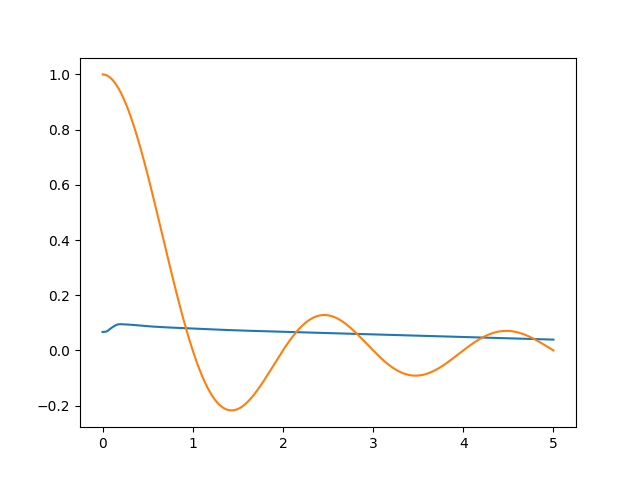

/tmp/ipykernel_372822/2013314580.py:2: RuntimeWarning: invalid value encountered in true_divide
  f = lambda x: np.sin(np.pi*x)/(np.pi*x)


In [254]:
%matplotlib notebook
plt.plot(inp, res)
plt.plot(inp, f(inp))

In [185]:
inv = models.Sequential()
#n_zernike = 8
#n_actuators = 51


inv.add(layers.Dense(1))
inv.add(layers.Dense(1024, activation='relu', kernel_initializer='normal'))
inv.add(layers.Dropout(0.5))
inv.add(layers.Dense(512, activation='relu'))
inv.add(layers.Dropout(0.5))
inv.add(layers.Dense(128))
inv.add(layers.Dense(1, activation="linear", kernel_initializer="normal"))

inv.compile(loss="mse", optimizer='adam')


In [ ]:
x = np.random.uniform(0, 5)